In [113]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import gurobi_logtools as glt

In [114]:
name = "Verification_16_eps0.0001"
PATH = f".\Experiments\{name}\Logs_Analysis"

In [115]:
result = glt.parse(PATH+"\*.log")
summary = result.summary()


In [116]:

nl = result.progress("nodelog")
print(nl[~nl['Incumbent'].isna()])
nl.head()

      CurrentNode  RemainingNodes       Obj  Depth  IntInf  Incumbent  \
28           3410           274.0       NaN    NaN     NaN -15.710720   
29           3414           277.0 -15.69764   80.0     0.0 -15.710720   
30           5041           246.0       NaN   32.0     NaN -15.710720   
31           8298          1161.0 -15.70381   45.0   529.0 -15.710720   
32          11742          1513.0       NaN   48.0     NaN -15.710720   
33          14102          1756.0       NaN   98.0     NaN -15.710720   
34          18195          2282.0       NaN   69.0     NaN -15.710720   
35          21874          2255.0       NaN   56.0     NaN -15.710720   
36          24579          2325.0 -15.71031   72.0   493.0 -15.710720   
37          28621          3671.0 -15.70961   64.0   530.0 -15.710720   
38          34079             NaN       NaN    NaN     NaN -15.710720   
63           2987           281.0       NaN    NaN     NaN -15.710727   
64           2989           282.0 -14.81254   23.0 

c:\Users\sian_\OneDrive\Documents\Thesis\alt_code\pyomo_env\lib\site-packages\gurobi_logtools\api.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  left=pd.concat(progress),


,CurrentNode,RemainingNodes,Obj,Depth,IntInf,Incumbent,BestBd,Gap,ItPerNode,Time,Pruned,NewSolution,LogFilePath,LogNumber,Seed,Version
0,0,0.0,85.30878,0.0,768.0,NaN,85.30878,NaN,NaN,0.0,NaN,NaN,.\Experiments\Verification_16_eps0.0001\Logs_A...,1,0,11.0.2
1,0,0.0,85.30878,0.0,769.0,NaN,85.30878,NaN,NaN,0.0,NaN,NaN,.\Experiments\Verification_16_eps0.0001\Logs_A...,1,0,11.0.2
2,0,0.0,85.23205,0.0,743.0,NaN,85.23205,NaN,NaN,0.0,NaN,NaN,.\Experiments\Verification_16_eps0.0001\Logs_A...,1,0,11.0.2
3,0,0.0,85.16222,0.0,744.0,NaN,85.16222,NaN,NaN,0.0,NaN,NaN,.\Experiments\Verification_16_eps0.0001\Logs_A...,1,0,11.0.2
4,0,0.0,85.16168,0.0,744.0,NaN,85.16168,NaN,NaN,0.0,NaN,NaN,.\Experiments\Verification_16_eps0.0001\Logs_A...,1,0,11.0.2


In [117]:
print(nl[~nl['NewSolution'].isna()]["NewSolution"])

28      H
63      H
3107    H
3110    H
3123    H
3127    H
Name: NewSolution, dtype: object


In [118]:
regex_pattern = r'vit_(\d+)_(\d+)_(\d+)_(\d+)_i(\d+)_r(\d+)_c(\d+)\.log'
nl[['Embed_Dim', 'Enc_Layers', 'Heads', 'Mlp_Dim', 'I', 'Repetition', 'Config']] = nl['LogFilePath'].str.extract(regex_pattern)
nl.head()


,CurrentNode,RemainingNodes,Obj,Depth,IntInf,Incumbent,BestBd,Gap,ItPerNode,Time,...,LogNumber,Seed,Version,Embed_Dim,Enc_Layers,Heads,Mlp_Dim,I,Repetition,Config
0,0,0.0,85.30878,0.0,768.0,NaN,85.30878,NaN,NaN,0.0,...,1,0,11.0.2,12,1,6,12,4,1,3
1,0,0.0,85.30878,0.0,769.0,NaN,85.30878,NaN,NaN,0.0,...,1,0,11.0.2,12,1,6,12,4,1,3
2,0,0.0,85.23205,0.0,743.0,NaN,85.23205,NaN,NaN,0.0,...,1,0,11.0.2,12,1,6,12,4,1,3
3,0,0.0,85.16222,0.0,744.0,NaN,85.16222,NaN,NaN,0.0,...,1,0,11.0.2,12,1,6,12,4,1,3
4,0,0.0,85.16168,0.0,744.0,NaN,85.16168,NaN,NaN,0.0,...,1,0,11.0.2,12,1,6,12,4,1,3


In [119]:
nl

,CurrentNode,RemainingNodes,Obj,Depth,IntInf,Incumbent,BestBd,Gap,ItPerNode,Time,...,LogNumber,Seed,Version,Embed_Dim,Enc_Layers,Heads,Mlp_Dim,I,Repetition,Config
0,0,0.0,85.30878,0.0,768.0,NaN,85.308780,NaN,NaN,0.00,...,1,0,11.0.2,12,1,6,12,4,1,3
1,0,0.0,85.30878,0.0,769.0,NaN,85.308780,NaN,NaN,0.00,...,1,0,11.0.2,12,1,6,12,4,1,3
2,0,0.0,85.23205,0.0,743.0,NaN,85.232050,NaN,NaN,0.00,...,1,0,11.0.2,12,1,6,12,4,1,3
3,0,0.0,85.16222,0.0,744.0,NaN,85.162220,NaN,NaN,0.00,...,1,0,11.0.2,12,1,6,12,4,1,3
4,0,0.0,85.16168,0.0,744.0,NaN,85.161680,NaN,NaN,0.00,...,1,0,11.0.2,12,1,6,12,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,0,2.0,-4.71185,0.0,379.0,-12.498410,-4.711850,0.623000,NaN,2.00,...,1,0,11.0.2,6,1,6,12,4,1,4
3125,2076,1020.0,-12.49246,25.0,344.0,-12.498410,-12.490870,0.000600,23.5,5.00,...,1,0,11.0.2,6,1,6,12,4,1,4
3126,3431,1733.0,-12.49273,28.0,0.0,-12.498410,-12.490870,0.000600,23.0,12.00,...,1,0,11.0.2,6,1,6,12,4,1,4
3127,3433,1648.0,NaN,NaN,NaN,-12.498405,-12.490870,0.000600,23.4,13.00,...,1,0,11.0.2,6,1,6,12,4,1,4


In [120]:
import pandas as pd
import numpy as np

nl2 = nl
# Ensure columns are numeric, converting non-numeric entries to NaN
for col in ['Time', 'CurrentNode', 'NewSolution', 'Gap', 'Incumbent']:
    nl2[col] = pd.to_numeric(nl[col], errors='coerce')

# Define helper functions for individual column aggregations
def time_to_first_feasible(series):
    feasible_times = series.dropna()
    return feasible_times.min() if not feasible_times.empty else np.nan

def count_feasible(series):
    feasible_times = series.dropna()
    return feasible_times.min() if not feasible_times.empty else np.nan

def final_value(series):
    valid_values = series.dropna()
    return valid_values.iloc[-1] if not valid_values.empty else np.nan

def unique_solutions(series):
    return series.dropna().nunique()

# Aggregate metrics per Embed_Dim, Enc_Layers, and Config
config_metrics = (
    nl2.groupby(['Embed_Dim', 'Enc_Layers', 'Config']).agg(
        Time_to_optimal=('Time', 'max'),
        Nodes_explored=('CurrentNode', 'max'),
        Solutions_found=('Incumbent', unique_solutions),
        Final_gap=('Gap', final_value),
        Objective_value=('Incumbent', final_value)
    )
    .reset_index()
)

# Average the metrics for each unique combination of Embed_Dim, Enc_Layers, and Config
average_metrics = config_metrics.groupby(['Embed_Dim', 'Enc_Layers', 'Config']).mean(numeric_only=True).reset_index()

# Display the resulting DataFrame
average_metrics.columns = [
    'Embed_Dim', 'Enc_Layers', 'Config', 'Avg_Time_to_optimal', 
    'Avg_Nodes_explored', 'Avg_Solutions_found', 'Avg_Final_gap', 'Avg_Objective_value'
]

average_metrics


,Embed_Dim,Enc_Layers,Config,Avg_Time_to_optimal,Avg_Nodes_explored,Avg_Solutions_found,Avg_Final_gap,Avg_Objective_value
0,12,1,3,63.70,34079.0,3.0,0.000092,-15.710720
1,12,1,4,44.75,28273.0,3.0,0.000086,-15.710727
2,18,1,3,16932.00,2623001.0,0.0,NaN,NaN
3,6,1,3,15.53,2404.0,4.0,0.000004,-12.498409
4,6,1,4,13.21,3434.0,4.0,0.000005,-12.498405


In [121]:
# 1 rep --> nothing to avg over
group_metrics = (
    nl2.groupby(['Embed_Dim', 'Enc_Layers', 'Config', 'Time']).agg(
        Incumbent_mean=('Incumbent', 'mean'),
        Incumbent_std=('Incumbent', 'std'),
        BestBd_mean=('BestBd', 'mean'),
        BestBd_std=('BestBd', 'std')
    )
    .reset_index()
)

# Average the metrics for each unique combination of Embed_Dim, Enc_Layers, and Config
#grouped_nl = group_metrics.groupby(['Embed_Dim', 'Enc_Layers', 'Config']) #.mean(numeric_only=True).reset_index()

# # Display the resulting DataFrame
# grouped_nl.columns = ['Embed_Dim', 'Enc_Layers', 'Config', 'Time', 'Incumbent_mean', 'Incumbent_std', 'BestBd_mean', 'BestBd_std']

grouped_nl = nl # 1 rep
grouped_nl['Incumbent_mean'] = grouped_nl['Incumbent']
grouped_nl['BestBd_mean'] = grouped_nl['BestBd']
configs = grouped_nl[['Embed_Dim', 'Enc_Layers', 'Config']].drop_duplicates().values
average_metrics

,Embed_Dim,Enc_Layers,Config,Avg_Time_to_optimal,Avg_Nodes_explored,Avg_Solutions_found,Avg_Final_gap,Avg_Objective_value
0,12,1,3,63.70,34079.0,3.0,0.000092,-15.710720
1,12,1,4,44.75,28273.0,3.0,0.000086,-15.710727
2,18,1,3,16932.00,2623001.0,0.0,NaN,NaN
3,6,1,3,15.53,2404.0,4.0,0.000004,-12.498409
4,6,1,4,13.21,3434.0,4.0,0.000005,-12.498405


In [122]:
configs

array([['12', '1', '3'],
       ['12', '1', '4'],
       ['18', '1', '3'],
       ['6', '1', '3'],
       ['6', '1', '4']], dtype=object)

In [123]:
# combinations = {
#     #'All': {'LN_I': 1, 'MHA_I': 1, 'MHA_D': 1, 'MHA_MC': 1},
#     #'No_MC': {'LN_I': 1, 'MHA_I': 1, 'MHA_D': 1, 'MHA_MC': 0},
#     # 'I_only': {'LN_I': 1, 'MHA_I': 1, 'MHA_D': 0, 'MHA_MC': 0},
#     # # 'LN_only': {'LN_I': 1, 'MHA_I': 0, 'MHA_D': 0, 'MHA_MC': 0},
#     # # 'Prop_MC': {'LN_I': 1, 'MHA_I': 0, 'MHA_D': 1, 'MHA_MC': 1},
#     # 'LN_prop': {'LN_I': 1, 'MHA_I': 0, 'MHA_D': 1, 'MHA_MC': 0},
#     # 'None': {'LN_I': 0, 'MHA_I': 0, 'MHA_D': 0, 'MHA_MC': 0},
# }
conf = ['No_MC','I_only', 'LN_prop', 'ALL']
combinations = {}
for i in configs:
        print(i, conf)
        combinations[f'E{i[0]}_D{i[1]}_{conf[int(i[-1])-1]}'] = i[0]+i[-1]
    
print(combinations)

['12' '1' '3'] ['No_MC', 'I_only', 'LN_prop', 'ALL']
['12' '1' '4'] ['No_MC', 'I_only', 'LN_prop', 'ALL']
['18' '1' '3'] ['No_MC', 'I_only', 'LN_prop', 'ALL']
['6' '1' '3'] ['No_MC', 'I_only', 'LN_prop', 'ALL']
['6' '1' '4'] ['No_MC', 'I_only', 'LN_prop', 'ALL']
{'E12_D1_LN_prop': '123', 'E12_D1_ALL': '124', 'E18_D1_LN_prop': '183', 'E6_D1_LN_prop': '63', 'E6_D1_ALL': '64'}


C:\Users\sian_\AppData\Local\Temp\ipykernel_28000\518771289.py:34: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-x" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(config_data['Time'], config_data['Incumbent_mean'],'-x',linestyle='-', label=f'{config_names[i]} - Incumbent', color=color)


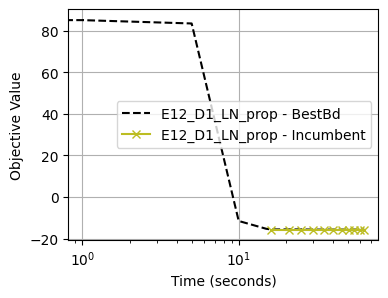

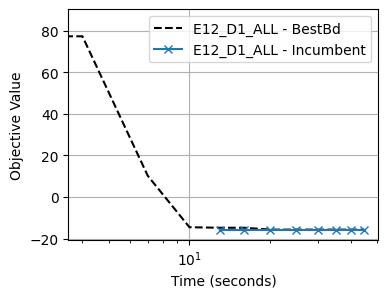

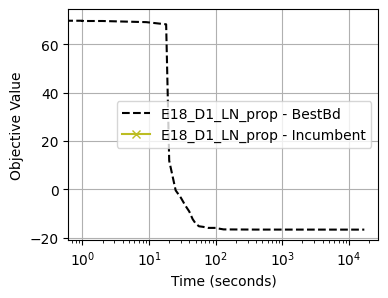

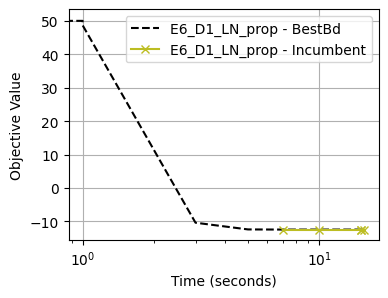

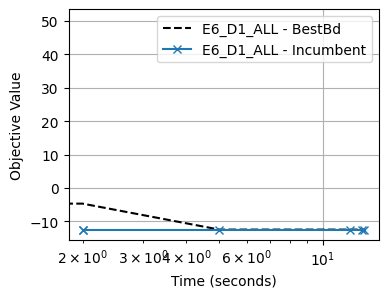

In [124]:
import matplotlib.pyplot as plt

# Initialize the figure size
colors = plt.get_cmap('tab10', len(grouped_nl['Config'].unique()))
config_names = list(combinations.keys())
colours = ['tab:orange', 'tab:red', 'tab:olive', 'tab:blue']
# Find the global min and max values for both the x and y axes across all configurations
# x_min = 0#grouped_nl['Time'].min() #10#
# x_max = 20#grouped_nl['Time'].max()

# y_min = min(grouped_nl['Incumbent_mean'].min(), grouped_nl['BestBd_mean'].min()) #1e-4 #
# y_max = max(grouped_nl['Incumbent_mean'].max(), grouped_nl['BestBd_mean'].max())

# Plot each configuration using the same x and y axis limits
for i, config in enumerate(configs):
    plt.figure(i, figsize=(4, 3))
    config_data = grouped_nl[(grouped_nl['Embed_Dim'] == config[0]) & (grouped_nl['Enc_Layers'] == config[1]) & (grouped_nl['Config'] == config[-1])]
    color = colours[int(config[-1])-1]

    

    # Plot BestBd mean
    plt.plot(config_data['Time'], config_data['BestBd_mean'], linestyle='--', label=f'{config_names[i]} - BestBd', color='k')
    # Add shaded area for BestBd std
    # plt.fill_between(config_data['Time'], 
    #                  config_data['BestBd_mean'] - config_data['BestBd_std'], 
    #                  config_data['BestBd_mean'] + config_data['BestBd_std'], 
    #                  color="black", alpha=0.5)
    # # Set to log scale
    # plt.yscale('log')
    plt.xscale('log')
    
    # Plot Incumbent mean
    plt.plot(config_data['Time'], config_data['Incumbent_mean'],'-x',linestyle='-', label=f'{config_names[i]} - Incumbent', color=color)
    #Add shaded area for Incumbent std
    # plt.fill_between(config_data['Time'], 
    #                  config_data['Incumbent_mean'] - config_data['Incumbent_std'], 
    #                  config_data['Incumbent_mean'] + config_data['Incumbent_std'], 
    #                  color="black", alpha=0.5)

    # # Set the same x and y limits for all plots
    # plt.xlim(0, 65)
    # plt.ylim(-20, 90)

    # Add labels
    plt.grid(True)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Objective Value')
    plt.legend()
    

    # PATH = r"C:\Users\sian_\OneDrive\Documents\Thesis"
    # plt.savefig(PATH+f'\images\{config_names[i]}_time_conv.png')  
    # #plt.show()
     


In [125]:
grouped_nl2 = nl.groupby(['Config', 'CurrentNode']).agg({
    'Incumbent': ['mean', 'std'],
    'BestBd': ['mean', 'std']
}).reset_index()

configs = grouped_nl2['Config'].unique()
grouped_nl2.columns = ['Config', 'Node', 'Incumbent_mean', 'Incumbent_std', 'BestBd_mean', 'BestBd_std']
grouped_nl2.head()

,Config,Node,Incumbent_mean,Incumbent_std,BestBd_mean,BestBd_std
0,3,0,NaN,NaN,65.388881,19.773215
1,3,13,NaN,NaN,68.228200,NaN
2,3,65,NaN,NaN,11.780640,NaN
3,3,90,NaN,NaN,-12.439280,NaN
4,3,348,NaN,NaN,-11.552940,NaN


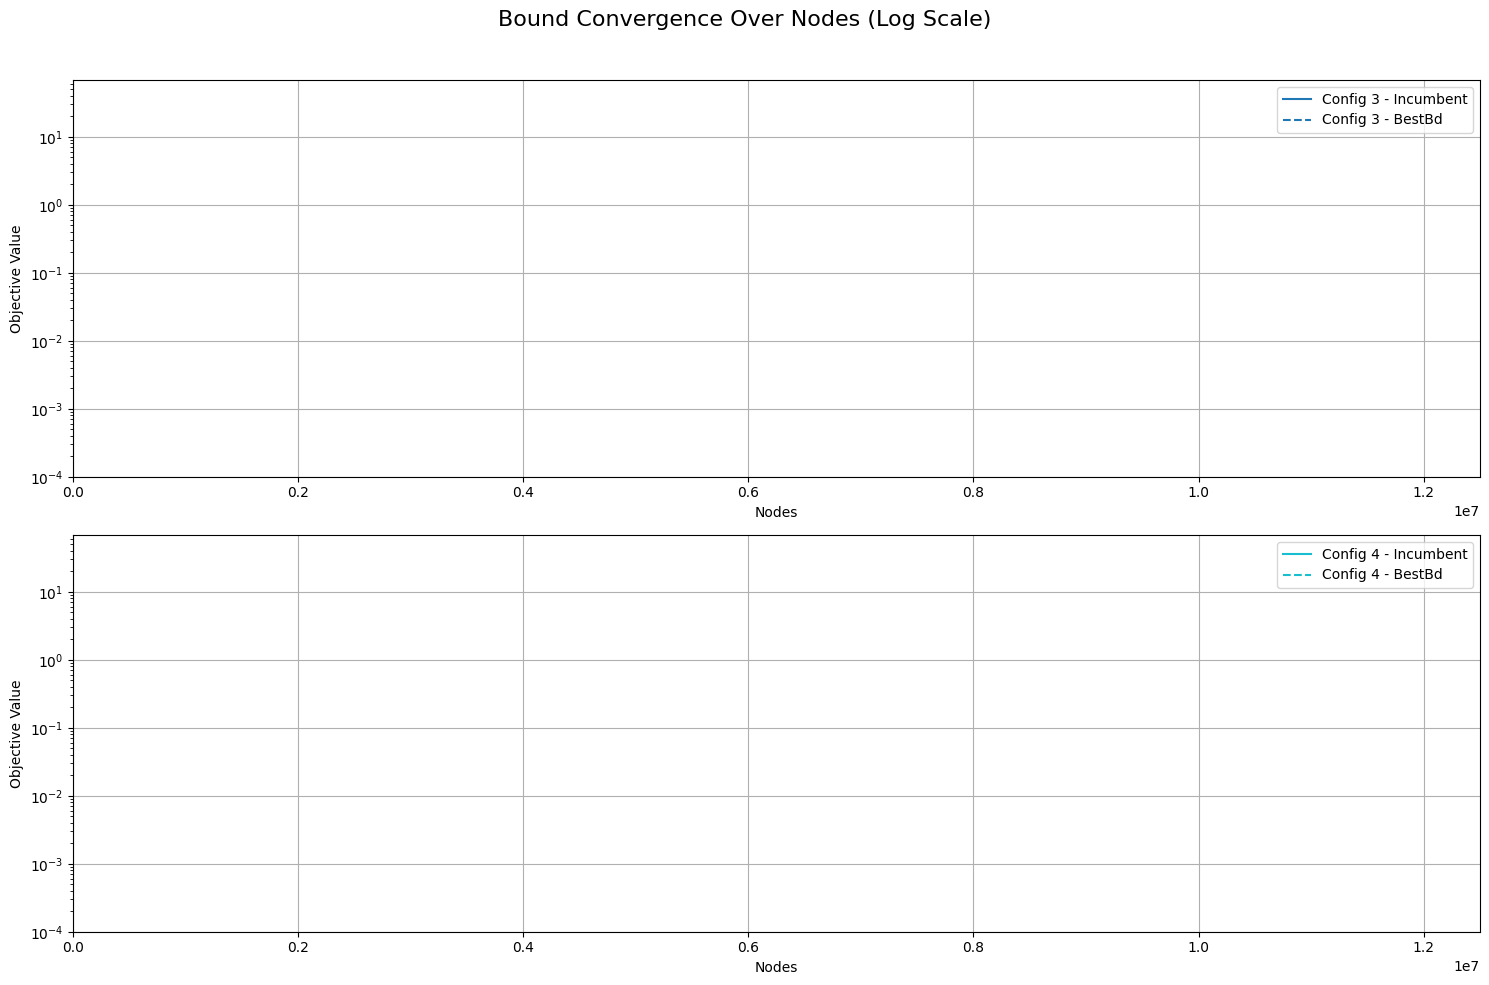

<Figure size 640x480 with 0 Axes>

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the number of subplots based on the number of configurations
num_configs = len(configs)
fig, axes = plt.subplots(nrows=2, ncols=(num_configs + 1) // 2, figsize=(15, 10))  # Adjust subplot grid

# Set the color map for the plots
colors = plt.get_cmap('tab10', num_configs)

# Find the global min and max values for the x and y axes across all configurations
x_min = grouped_nl2['Node'].min()
x_max = 1.25e7
y_min = 1e-4
y_max = max(grouped_nl2['Incumbent_mean'].max(), grouped_nl2['BestBd_mean'].max())

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each configuration in a separate subplot
for i, config in enumerate(configs):
    ax = axes[i]
    config_data = grouped_nl2[grouped_nl2['Config'] == config]
    color = colors(i)

    # Plot Incumbent mean
    ax.plot(config_data['Node'], config_data['Incumbent_mean'], label=f'Config {config} - Incumbent', color=color)
    # Add shaded area for Incumbent std
    ax.fill_between(config_data['Node'], 
                    config_data['Incumbent_mean'] - config_data['Incumbent_std'], 
                    config_data['Incumbent_mean'] + config_data['Incumbent_std'], 
                    color=color, alpha=0.2)

    # Plot BestBd mean
    ax.plot(config_data['Node'], config_data['BestBd_mean'], linestyle='--', label=f'Config {config} - BestBd', color=color)
    # Add shaded area for BestBd std
    ax.fill_between(config_data['Node'], 
                    config_data['BestBd_mean'] - config_data['BestBd_std'], 
                    config_data['BestBd_mean'] + config_data['BestBd_std'], 
                    color=color, alpha=0.2)

    # Set log scale and axis limits
    ax.set_yscale('log')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Add labels and grid
    ax.set_xlabel('Nodes')
    ax.set_ylabel('Objective Value')
    ax.grid(True)
    ax.legend()

# Set the title for the entire figure
fig.suptitle('Bound Convergence Over Nodes (Log Scale)', fontsize=16)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

# Optionally, save the figure
PATH = r"C:\Users\sian_\OneDrive\Documents\Thesis"
plt.savefig(PATH + r'\images\bound_convergence_nodes_subplots.png')
